# Experiment 1
---

Prerequisites
--------
------------

**Registration number:** 191910

Alpha = 1 + mod(910,4)

**Alpha** = 3

In [ ]:
# Import Statements
import numpy as np
import pandas as pd
import scipy as sc
import math
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy import signal as sg
from IPython.display import Audio

In [ ]:
# Alpha  = 1 + mod(910,4)
alpha = 1 + (910%4)

In [ ]:
# This is because I'm using Google Colab Noteboook 
# So please don't run this without mounting the drive
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/DSP\ LAB/Experiment\ 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/DSP LAB/Experiment 1'
/content/drive/My Drive/DSP LAB/Experiment 1


Question  #1
-----
-----

In [ ]:
time1 = np.arange(0.0,10.0001,0.0001)
time2 = time1 - (1.5*alpha)
time3 = time1 * 2
def fn(time):
  return np.exp(time*(-alpha))

Text(263.4544117647059, 0.5, 'x(2t)')

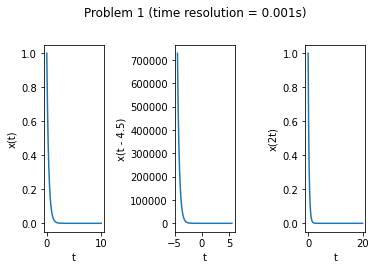

In [ ]:
fn1 = fn(time1)
fn2 = fn(time2)
fn3 = fn(time3)
fig,axes = plt.subplots(1,3)
plt.tight_layout(pad=4)
fig.suptitle('Problem 1 (time resolution = 0.001s) ')
# 1st Mini Plot to plot x(t)
axes[0].plot(time1,fn1)
axes[0].set_xlabel("t")
axes[0].set_ylabel("x(t)")
# 2nd Mini Plot to plot x(t-1.5alpha)
axes[1].plot(time2,fn2)
axes[1].set_xlabel("t")
axes[1].set_ylabel("x(t - 4.5)")
# 3rd Mini Plot to plot x(2t)
axes[2].plot(time3,fn3)
axes[2].set_xlabel("t")
axes[2].set_ylabel("x(2t)")


Magnitude and Spectrum

-----

$\alpha = 3$

Since My Registration number is 191910 ( 1 + mod(910,4))

_X($\Omega$)_$\ = \frac{1}{(α^2 + j\Omega)}$ $= \frac{1}{(3^2 + j\Omega)}$ $= \frac{1}{(9 + j\Omega)}$

_Maginitude Spectrum_ $= |X(\Omega)|$ $= \frac{1}{\sqrt{α^2 + \Omega^2}}$  $= \frac{1}{\sqrt{3^2 + \Omega^2}}$ $= \frac{1}{\sqrt{9 + \Omega^2}}$

_Phase Spectrum_ $= \arctan{\frac{\Omega}{\alpha}}$ $= \arctan{\frac{\Omega}{3}}$

--------------------
$Fourier\ Transform\ of\ x(t - 4.5) <=> Y(\Omega) = e^{-4.5j\Omega}X(\Omega)$

$Fourier\ Transform\ of\ x(2t) <=> Z(\Omega) = \frac{X(\frac{\Omega}{2})}{2}$

Text(0, 0.5, 'Phase spectra')

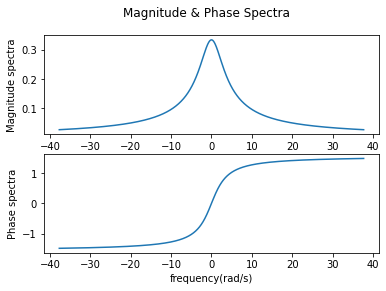

In [ ]:
omega = np.arange(-6,6,0.0001) * 2 * np.pi
def fn1(t):
  return (1/np.sqrt(9 + t**2))
def fn2(t):
  return np.arctan2(t,3)
mag_spectra = np.array([fn1(t) for t in omega])
phase_spectra = np.array([fn2(t) for t in omega])

fig , axes = plt.subplots(2)
fig.suptitle("Magnitude & Phase Spectra")
axes[0].plot(omega, mag_spectra)
axes[0].set_xlabel("frequency(rads/s)")
axes[0].set_ylabel("Magnitude spectra")
axes[1].plot(omega, phase_spectra)
axes[1].set_xlabel("frequency(rad/s)")
axes[1].set_ylabel("Phase spectra")

Question  #2
-----
-----



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


<StemContainer object of 3 artists>

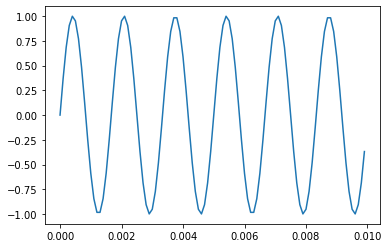

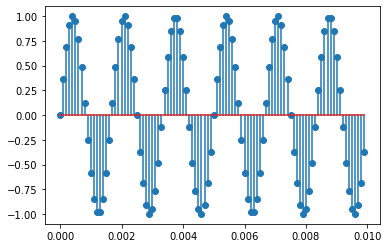

In [ ]:
f1 = 200*3
f2 = 220*3
pi = np.pi
t = np.arange(0,5,0.0001)
y1 = np.sin(2*pi*f1*t)
y2 = np.sin(2*pi*f2*t)
y = np.append(y1,y2,axis = 0)

plt.plot(t[0:100],y[0:100])
plt.figure()
plt.stem(t[0:100],y[0:100])

Question  #3
-----
-----

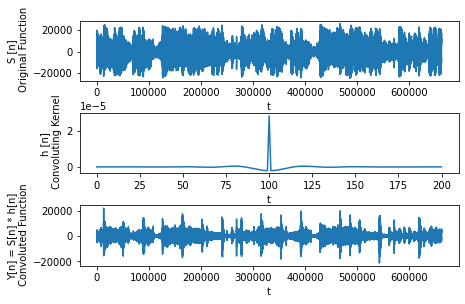

In [ ]:
sf, s = wavfile.read('Track003.wav')
s = s[:,0]      # Storing only the first column in the signal
#print(signal)
array = []
with open('ConvFile3.txt', "r") as f:
  array = f.read().splitlines()
array = np.array(array)
array = array.astype(np.float32)

array = array/32767.0
convolution_mode_1 = np.convolve(s, array, mode='same')
convolution_mode_1 = convolution_mode_1 * 32767.0

convolution_mode_2 = np.convolve(s, array, mode='valid')
convolution_mode_2 = convolution_mode_2 * 32767.0

convolution_mode_3 = np.convolve(s, array, mode='full')
convolution_mode_3 = convolution_mode_3 * 32767.0

# Plotting the originial function & convoluted function
fig, axes = plt.subplots(3)
plt.tight_layout(pad=1.1)

time_1 = np.arange(0, len(s))
#plt.tight_layout(pad=3.5)
#fig.suptitle('Problem 3 ')

#axes[0].set_title("Original Function")
axes[0].set_xlabel("t")
axes[0].set_ylabel("S [n]\n Original Function")
axes[0].plot(time_1, s)

#axes[1].set_title("Convoluting Kernel")
axes[1].set_xlabel("t")
axes[1].set_ylabel("h [n]\n Convoluting Kernel")
axes[1].plot(np.arange(0, len(array)), array)

#axes[2].set_title("Convoluted Function")
axes[2].set_xlabel("t")
axes[2].set_ylabel("Y[n] = S[n] * h[n]\n Convoluted Function")
axes[2].plot(time_1, convolution_mode_1)

# Convolution Lengths
# print(convolution_mode_1.shape)
# print(convolution_mode_2.shape)
# print(convolution_mode_3.shape)
# Write the various convoluted functions to wavfile
wavfile.write('Q3_output_1.wav', sf, convolution_mode_1)
wavfile.write('Q3_output_2.wav', sf, convolution_mode_2)
wavfile.write('Q3_output_3.wav', sf, convolution_mode_3)

Result
------
---------
* It can be observed that the convoluted signal i.e Y[n] is **High pass filter**. 
* This means that the slow changing values are removed and only the fast changing values remain.

Question  #4
-----
-----

In [ ]:
def y_of_n(sf, s):
  const = (2 * np.pi * 500)/sf
  return np.multiply(s,np.cos(const * np.arange(0, len(s))))

sf, s = wavfile.read('speech.wav')
y = y_of_n(sf, (s/32767.0))
wavfile.write("problem_4_output.wav", sf, y)
Audio(y, rate=sf, autoplay=True)

Text(20.75, 0.5, 's [n]')

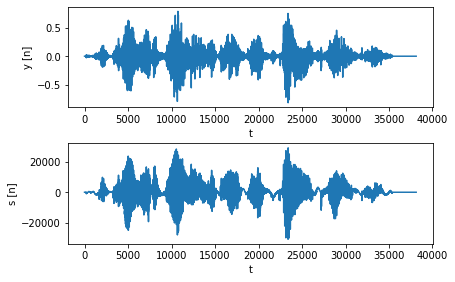

In [ ]:
time = np.arange(0, len(s))
fig, axes = plt.subplots(2)
plt.tight_layout(pad=1.5)
axes[0].plot(time, y)
axes[0].set_xlabel("t")
axes[0].set_ylabel("y [n]")
axes[1].plot(time, s)
axes[1].set_xlabel("t")
axes[1].set_ylabel("s [n]")

Text(0, 0.5, '$\\hat{x}(\\gamma)$')

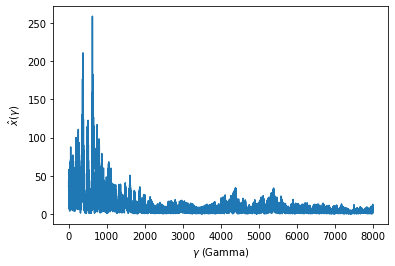

In [ ]:
C = int(len(y) / 2)
C = int(C * (sf/2) / float(sf) * 2) 
X = np.abs(np.fft.fft(y)[0:C])
N = sf * np.arange(0, C) / len(y);
plt.plot(N, X)
plt.xlabel("$\gamma$ (Gamma)")
plt.ylabel('$\hat{x}(\gamma)$')